# Wrfcf Livneh 2017-02-05 to 2017-02-17 Las Vegas Time Series

In [1]:
# imports
import numpy
import Nio
import Ngl
from IPython import display
import netCDF4 as nc
from datetime import date
from datetime import timedelta
import xarray as xr
import xesmf as xe
import matplotlib.pyplot as plt

In [2]:
# reading in livneh
fn = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/ptt_2017.nc'
liv = xr.open_dataset(fn)

In [3]:
# based on bias mapping
# finding coords in livneh close to these, arbitrarily choosing the first value in the output array
lat_ind = numpy.where(numpy.logical_and(liv['lat'].data.flatten() >= 36, liv['lat'].data.flatten() <= 37))[0][0]
lon_ind = numpy.where(numpy.logical_and(liv['lon'].data.flatten() >= -116, liv['lon'].data.flatten() <= -115))[0][0]

In [4]:
# tmax values at coords for each day
liv_arr = liv['Tmax'].isel(lat=lat_ind, lon=lon_ind)[35:46]

In [5]:
# reading in wrfcf tmaxes
wrf_05 = xr.open_dataset('./wrf_05-Copy1.nc')
wrf_06 = xr.open_dataset('./wrf_06-Copy1.nc')
wrf_07 = xr.open_dataset('./wrf_07-Copy1.nc')
wrf_08 = xr.open_dataset('./wrf_08-Copy1.nc')
wrf_09 = xr.open_dataset('./wrf_09-Copy1.nc')
wrf_10 = xr.open_dataset('./wrf_10-Copy1.nc')
wrf_11 = xr.open_dataset('./wrf_11-Copy1.nc')
wrf_12 = xr.open_dataset('./wrf_12-Copy1.nc')
wrf_13 = xr.open_dataset('./wrf_13-Copy1.nc')
wrf_14 = xr.open_dataset('./wrf_14-Copy1.nc')
wrf_15 = xr.open_dataset('./wrf_15-Copy1.nc')

wrf_lst = [wrf_05, wrf_06, wrf_07, wrf_08, wrf_09, wrf_10, wrf_11, wrf_12, wrf_13, wrf_14, wrf_15]

In [6]:
# creates array of all T_2m max values at lat lon for each day
def wrf_tmaxes():
    result_arr = []
    for i in wrf_lst:
        lat_index = numpy.where(numpy.logical_and(i['lat'].data.flatten() >= 36, 
                                                 i['lat'].data.flatten() <= 37))[0][0]
        lon_index = numpy.where(numpy.logical_and(i['lon'].data.flatten() >= -116, 
                                                 i['lon'].data.flatten() <= -115))[0][0]
        val = i['maxes'].isel(lat=lat_ind, lon=lon_ind) - 273.15 # convert from K to C
        result_arr.append(val.data.item(0))
    return result_arr

wrf_arr = wrf_tmaxes()
wrf_arr

[17.12939624987507,
 16.29569384021454,
 19.570277059030957,
 19.38382610480869,
 24.15575232118067,
 20.27813138420072,
 15.708816882302642,
 17.786756458031448,
 19.655943487021148,
 18.856185197739478,
 20.125104063023628]

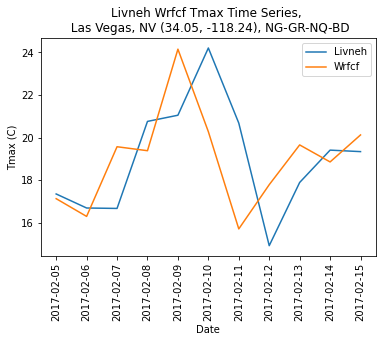

In [7]:
# time series plot
y1 = liv_arr.data
y2 = wrf_arr
x = numpy.array(['2017-02-05', 
                '2017-02-06',
                '2017-02-07',
                '2017-02-08',
                '2017-02-09',
                '2017-02-10',
                '2017-02-11',
                '2017-02-12',
                '2017-02-13',
                '2017-02-14',
                '2017-02-15'])
plt.plot(x, y1) # livneh blue
plt.plot(x, y2) # wrfcf orange

# plot styling
plt.title("Livneh Wrfcf Tmax Time Series, \n Las Vegas, NV (34.05, -118.24), NG-GR-NQ-BD")
plt.xlabel("Date")
plt.ylabel("Tmax (C)")
plt.xticks(rotation=90)
plt.gca().legend(('Livneh','Wrfcf'))

plt.show()

fin.